# **Top Spotify Songs in 73 Countries - A complete EDA**
---
**Contributors:**\
Following members have contributed in the development of this notebook.
1. Hassan Absar Qaimkhani
2. Muhammad Ahsan Rabbi
3. Muhammad Sheraz Aamir
4. Muhammad Haseeb Abbasi
5. Abdul Muid
6. Muhammad Saqib
---


**Date:** 28-10-2023
---

## **DATA SET:**
This data is collected from [kaggle.com](www.kaggle.com) and can be accessed from [here](https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated).\
(**Note:** Since this data is updated on daily basis, it might be possible that data you find through this link is more recent and updated then the one used in this notebook. Therefore, link of the dataset used in this notebook can be accessed through this Google Drive [Link](https://drive.google.com/uc?id=1NASMtgbdCspPvjUPWAa-24z0qgQYYT7l).)
### Author/Collaborator of Dataset: asaniczka ([kaggle account](https://www.kaggle.com/asaniczka))
---

### **General Information:**
This dataset contains the Daily top 50 songs on Spotify for each country. The data is updated daily and includes various features such as song duration, artist details, album information, and song popularity.
The dataset is divided into 40172 rows and 25 columns. Some main features of each column are as follows:
1. `spotify_id`: It shows the unique idntifer for the song in the Spotify database.
2. `name`: It shows the title of the song.
3. `artists`: It shows the name(s) of the artist(s) asociated with he song. 
4. `daily_rank`: It shows the daily rank of the song amount the top 50 songs for this country.
5. `daily_movement`: It shows the change in rankings compared to the previous day for the same country.
6. `weekly_movement`: It shows the change in rankings compared to the previous week for the same country.
7. `country`: It shows the ISO Code of the country. (If NULL,  then the playlist is 'Global'. Since Global doesn't have an ISO code, it is not put here.)
8. `snapshot_date`: It shows the date onwhich the data was colleted from the Spotify API.
9. `popularity`: It is a measure of the song's current popularity on Spotify.
10. `is_explict`: It indicates whether the songcontains explicit lyrics.
11. `duration_ms`: It gives the duration of the song in milliseconds.
12. `album_name`: It gives the title of the album the song belongs to.
13. `album_release_date`: It gives the release date of the album the song belongs to.
14. `danceability`: It is a measure of how suitable the song is for dancing based on various musical elements.
15. `energy`: measure of the intensity and activity level of the song.
16. `key`: It highlights the key of the song.
17. `loudness`: It gives the overall loudness of the song in decibels.
18. `mode`: It indicates whether the song is in a major or minor key.
19. `speechiness`: It is a measure of the presence ofspoken words inthe song.
20. `acoustiness`: It is a measure of the acoustic quality of the song.
21. `instrumentalness`: It is a measure of the likelihood that the song does not contain vocals.
22. `liveness`: It is a measure of the prsence of a live audience in the recording.
23. `valence`: It is a measure of the musical positiveness conveyed by the song.
24. `tempo`: It gives the tempo of the song in beats per minute.
25. `time_signature`: It indicates the estimated overall time signature of the song.
---
### **Provenance**:
#### Source: 
Data was collected via the Spotify API.
#### COLLECTION METHODOLOGY:
Data is collected daily by querying the Spotify API for the top 50 songs for each country every day.

---
### **License:**
License information about the dataset can be accessed from [ODC Attribution License (ODC-By)](https://opendatacommons.org/licenses/by/1-0/index.html)

---


## Importing Important Liabraries
Before starting the EDA analysis, important libraries are imported.

In [2]:
# importing all liabraries that we will use in this EDA exercise.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Settings
Here are some important notebook settings that is used to assist at subsequent stages.

In [3]:
# Since data can contain numberical values to be formated with thousands separators and decimals, the number formats are defined here
# nf0 is number format with zero decimals and nf2 is number format with two decimals
nf0 = lambda x: f'{x:,.0f}' if isinstance(x, (int, float)) else x
nf2 = lambda x: f'{x:,.2f}' if isinstance(x, (int, float)) else x

In [4]:
# setting options to show maximum of row and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# disabling Warnings
import warnings
warnings.simplefilter(action='ignore')

## Importing Dataset

In [6]:
# #

# !pip install gdown

# import gdown

# # Replace the link with your sharing link and specify the destination path
# gdrive_file_url = "https://drive.google.com/uc?id=1NASMtgbdCspPvjUPWAa-24z0qgQYYT7l"
# output_path = "/content/05_universal_top_spotify_songs.csv"  # You can specify your desired output path

# # Download the file
# gdown.download(gdrive_file_url, output_path, quiet=False)


In [7]:
# importing dataset into df
df = pd.read_csv('./spotifyzip/universal_top_spotify_songs.csv')

## Data Overview

In [8]:
# no of rows, columns, and cells in the data
print("Rows=",len(df))
print("Columns=",len(df.columns))
print("Size=",df.size)

Rows= 40172
Columns= 25
Size= 1004300


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40172 entries, 0 to 40171
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spotify_id          40172 non-null  object 
 1   name                40171 non-null  object 
 2   artists             40171 non-null  object 
 3   daily_rank          40172 non-null  int64  
 4   daily_movement      40172 non-null  int64  
 5   weekly_movement     40172 non-null  int64  
 6   country             39620 non-null  object 
 7   snapshot_date       40172 non-null  object 
 8   popularity          40172 non-null  int64  
 9   is_explicit         40172 non-null  bool   
 10  duration_ms         40172 non-null  int64  
 11  album_name          40171 non-null  object 
 12  album_release_date  40171 non-null  object 
 13  danceability        40172 non-null  float64
 14  energy              40172 non-null  float64
 15  key                 40172 non-null  int64  
 16  loud

## Checking Null Values

In [10]:
# checking columns where Null values exists
null_count=df.isnull().sum()
null_percent=df.isnull().sum()*100/len(df)
df_a=pd.concat([null_count, null_percent.map(nf2)], axis=1)
# naming columns
df_a.columns = ['Null Count', 'Percentage']
df_a=df_a[df_a['Null Count']>0]
print(df_a)

                    Null Count Percentage
name                         1       0.00
artists                      1       0.00
country                    552       1.37
album_name                   1       0.00
album_release_date           1       0.00


## Checking Duplicate Values

In [11]:
# checking duplicate rows
df.duplicated().value_counts()

False    40172
Name: count, dtype: int64

## Checking Vital Statistics

In [12]:
# checking vitak statistics of df
df_a=df.describe()
df_a.map(nf2)

,daily_rank,daily_movement,weekly_movement,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,"40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00","40,172.00"
mean,25.51,2.41,13.72,78.57,"194,697.50",0.69,0.65,5.54,-6.63,0.49,0.11,0.29,0.02,0.17,0.53,122.12,3.91
std,14.44,9.18,16.86,15.26,"49,500.08",0.14,0.16,3.47,2.65,0.50,0.10,0.25,0.10,0.12,0.23,27.67,0.43
min,1.00,-38.00,-36.00,0.00,0.00,0.22,0.02,0.00,-22.50,0.00,0.02,0.00,0.00,0.02,0.04,47.91,1.00
25%,13.00,-1.00,0.00,67.00,"162,767.00",0.60,0.55,2.00,-8.03,0.00,0.04,0.09,0.00,0.10,0.36,99.97,4.00
50%,25.00,0.00,8.00,83.00,"188,108.00",0.71,0.67,6.00,-6.21,0.00,0.07,0.21,0.00,0.12,0.52,120.03,4.00
75%,38.00,2.00,27.00,90.00,"220,653.00",0.80,0.75,9.00,-4.91,1.00,0.14,0.46,0.00,0.21,0.71,140.06,4.00
max,50.00,49.00,49.00,100.00,"641,941.00",0.97,1.00,11.00,1.16,1.00,0.78,0.98,0.97,0.97,0.98,217.97,5.00


## Examining Anomaly

In [13]:
# song whose duration_ms ==0
df[df['duration_ms']==0]

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
26982,6yxtsR3nc3aUL1wcbLn8A3,NaN,NaN,30,1,20,NG,2023-10-21,0,False,0,NaN,NaN,0.791,0.515,1,-8.178,0,0.168,0.554,0.288,0.0821,0.507,102.932,4


## Excluding Anomaly From the Dataframe

In [14]:
# modifying the df to exclude song whose duration_ms ==0
df=df[df['duration_ms']!=0]

## Dealing with Null Values

In [15]:
# replacing missing values in country will GL
df['country'].fillna('GLO', inplace=True)

## Converting ISO Codes into Country Names

In [16]:
# inserting new column of countries name
df_a = {
    'AE': 'United Arab Emirates',
    'AR': 'Argentina',
    'AT': 'Austria',
    'AU': 'Australia',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'BO': 'Bolivia',
    'BR': 'Brazil',
    'BY': 'Belarus',
    'CA': 'Canada',
    'CH': 'Switzerland',
    'CL': 'Chile',
    'CO': 'Colombia',
    'CR': 'Costa Rica',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'DK': 'Denmark',
    'DO': 'Dominican Republic',
    'EC': 'Ecuador',
    'EE': 'Estonia',
    'EG': 'Egypt',
    'ES': 'Spain',
    'FI': 'Finland',
    'FR': 'France',
    'GB': 'United Kingdom',
    'GR': 'Greece',
    'GT': 'Guatemala',
    'HK': 'Hong Kong',
    'HN': 'Honduras',
    'HU': 'Hungary',
    'ID': 'Indonesia',
    'IE': 'Ireland',
    'IL': 'Israel',
    'IN': 'India',
    'IS': 'Iceland',
    'IT': 'Italy',
    'JP': 'Japan',
    'KR': 'South Korea',
    'KZ': 'Kazakhstan',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'LV': 'Latvia',
    'MA': 'Morocco',
    'MX': 'Mexico',
    'MY': 'Malaysia',
    'NG': 'Nigeria',
    'NI': 'Nicaragua',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'NZ': 'New Zealand',
    'PA': 'Panama',
    'PE': 'Peru',
    'PH': 'Philippines',
    'PK': 'Pakistan',
    'PL': 'Poland',
    'PT': 'Portugal',
    'PY': 'Paraguay',
    'RO': 'Romania',
    'SA': 'Saudi Arabia',
    'SE': 'Sweden',
    'SG': 'Singapore',
    'SK': 'Slovakia',
    'SV': 'El Salvador',
    'TH': 'Thailand',
    'TR': 'Turkey',
    'TW': 'Taiwan',
    'UA': 'Ukraine',
    'US': 'United States',
    'UY': 'Uruguay',
    'VE': 'Venezuela',
    'VN': 'Vietnam',
    'ZA': 'South Africa',
    'GLO': 'Global'
}

# Create the 'country_name' column by mapping 'country' to ISO codes
df['country_name'] = df['country'].map(df_a)


## Converting ISO Codes into Continent Names

In [17]:
# Create a dictionary to map countries to continents
df_a = {
    'AE': 'Asia',
    'AR': 'South America',
    'AT': 'Europe',
    'AU': 'Australia',
    'BE': 'Europe',
    'BG': 'Europe',
    'BO': 'South America',
    'BR': 'South America',
    'BY': 'Europe',
    'CA': 'North America',
    'CH': 'Europe',
    'CL': 'South America',
    'CO': 'South America',
    'CR': 'North America',
    'CZ': 'Europe',
    'DE': 'Europe',
    'DK': 'Europe',
    'DO': 'North America',
    'EC': 'South America',
    'EE': 'Europe',
    'EG': 'Africa',
    'ES': 'Europe',
    'FI': 'Europe',
    'FR': 'Europe',
    'GB': 'Europe',
    'GR': 'Europe',
    'GT': 'North America',
    'HK': 'Asia',
    'HN': 'North America',
    'HU': 'Europe',
    'ID': 'Asia',
    'IE': 'Europe',
    'IL': 'Asia',
    'IN': 'Asia',
    'IS': 'Europe',
    'IT': 'Europe',
    'JP': 'Asia',
    'KR': 'Asia',
    'KZ': 'Asia',
    'LT': 'Europe',
    'LU': 'Europe',
    'LV': 'Europe',
    'MA': 'Africa',
    'MX': 'North America',
    'MY': 'Asia',
    'NG': 'Africa',
    'NI': 'North America',
    'NL': 'Europe',
    'NO': 'Europe',
    'NZ': 'Australia',
    'PA': 'North America',
    'PE': 'South America',
    'PH': 'Asia',
    'PK': 'Asia',
    'PL': 'Europe',
    'PT': 'Europe',
    'PY': 'South America',
    'RO': 'Europe',
    'SA': 'Asia',
    'SE': 'Europe',
    'SG': 'Asia',
    'SK': 'Europe',
    'SV': 'North America',
    'TH': 'Asia',
    'TR': 'Asia',
    'TW': 'Asia',
    'UA': 'Europe',
    'US': 'North America',
    'UY': 'South America',
    'VE': 'South America',
    'VN': 'Asia',
    'ZA': 'Africa',
    'GLO': 'Global'
}

# Create the 'continent' column by mapping 'country' to continents
df['continent'] = df['country'].map(df_a)


In [18]:
df.sample(5)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,country_name,continent
12927,4Y60H8heDsEpQ2hin2g6V5,Baby Mama,Don Pero,29,1,-2,IT,2023-10-25,76,True,151160,Baby Mama,2022-10-27,0.595,0.832,5,-5.331,0,0.0425,0.0345,0.000000,0.1490,0.243,90.475,4,Italy,Europe
27775,3XKdJfbBwnxUnn5tdaJoYL,Papa,"DESH, Azahriah",28,-2,22,HU,2023-10-21,60,True,140480,DESHPERADO,2022-10-25,0.833,0.722,5,-7.579,0,0.0748,0.3820,0.000099,0.0986,0.425,104.017,4,Hungary,Europe
36890,7uyeEbG6hyApgXuEypGcsZ,Baddie,IVE,10,40,0,TW,2023-10-18,74,False,154360,I'VE MINE,2023-10-13,0.736,0.678,5,-4.503,1,0.0464,0.0459,0.000005,0.1040,0.757,160.045,4,Taiwan,Asia
21243,1JgknGBbrfmEHeOZH051SS,ecstacy (slowed),SUICIDAL-IDOL,41,7,9,CZ,2023-10-23,89,True,119120,ecstacy (slowed),2023-06-06,0.551,0.677,2,-7.311,1,0.0665,0.0173,0.000000,0.3810,0.195,106.414,4,Czech Republic,Europe
26422,6XSqqQIy7Lm7SnwxS4NrGx,Classy 101,"Feid, Young Miko",20,-2,30,PY,2023-10-21,93,True,195986,Classy 101,2023-03-31,0.859,0.658,11,-4.790,1,0.1590,0.1450,0.000000,0.1200,0.672,100.065,4,Paraguay,South America


# Exploratory Data Analysis

In this report, we present the results of our comprehensive Exploratory Data Analysis (EDA) of a music dataset containing information about top Spotify songs from 7 continents. The dataset encompasses a wide range of attributes, including song popularity, explicit content, music features, and more. Through this EDA, we aimed to uncover valuable insights and patterns within the dataset, shedding light on the relationships between different attributes and their variations across continents. Our analysis not only provides a deeper understanding of the dataset but also serves as a foundational step for subsequent data-driven decisions and modeling efforts in the realm of music analytics. Join us on this analytical journey to explore the fascinating world of music data.

___

**Task** As part of the exploratory data analysis (EDA), we want to understand the distribution of explicit and non-explicit songs listened to in each continent.

**Question** How does the count of explicit and non-explicit songs vary across different continents?

In [19]:
# count of explicit and not explicit songs listened in each continent
df_a=df.groupby(['continent','is_explicit'])['spotify_id'].count().sort_values(ascending=False).unstack()
df_a.map(nf2)

is_explicit,False,True
continent,,
Africa,"1,480.00",729.00
Asia,"7,920.00","1,457.00"
Australia,686.00,417.00
Europe,"9,146.00","6,750.00"
Global,263.00,289.00
North America,"1,958.00","3,566.00"
South America,"2,562.00","2,948.00"


This table provides insights into the distribution of explicit and non-explicit songs within each continent. It allows us to see variations in song preferences across different regions.

**Conclusion:** In Europe and North America, there is a significant number of explicit songs, while in Asia and Australia, non-explicit songs are more prevalent.

___

**Task** As part of the exploratory data analysis (EDA), we want to understand the mean popularity of explicit and non-explicit songs listened to in each continent.

**Question** How does the mean popularity differ between explicit and non-explicit songs in different continents?

In [20]:
# mean popularity of explicit and not explicit songs listened in each continent
df_a=df.groupby(['continent','is_explicit'])['popularity'].mean().sort_values(ascending=False).unstack()
df_a.map(nf2)

is_explicit,False,True
continent,,
Africa,64.64,68.36
Asia,75.31,85.81
Australia,87.53,90.05
Europe,73.74,76.10
Global,91.74,91.25
North America,85.56,88.17
South America,83.12,87.68


This table provides insights into the mean popularity of explicit and non-explicit songs within each continent. It allows us to see variations in the popularity of songs based on their explicit content across different regions.

**Conclusion**: Explicit songs tend to have higher mean popularity in most continents compared to non-explicit songs.

___

**Task** As part of the exploratory data analysis (EDA), we aim to calculate the total duration (in hours) of explicit and non-explicit songs listened to in each continent.

**Question** How does the total duration vary between explicit and non-explicit songs in different continents?

In [21]:
# total duration (in hours) of explicit and not explicit songs in each continent
df_a=df.groupby(['continent','is_explicit'])['duration_ms'].sum().sort_values(ascending=False).unstack()/1000/60/60
df_a.map(nf2)

is_explicit,False,True
continent,,
Africa,92.73,38.97
Asia,461.33,78.91
Australia,38.05,24.11
Europe,460.12,342.54
Global,14.35,16.44
North America,100.32,209.80
South America,125.62,169.31


This table provides insights into the total duration of explicit and non-explicit songs within each continent, measured in hours. It allows us to see variations in the listening habits in terms of song duration across different regions.

**Conclusion:** In South and North America, non-explicit songs have a significantly shorter total duration compared to explicit songs. On the other hand trend is opposit for all other continents.

___

**Task** As part of the exploratory data analysis (EDA), we want to examine the mean danceability of explicit and non-explicit songs in each continent.

**Question** How does the mean danceability vary between explicit and non-explicit songs in different continents?

In [22]:
# mean danceability of explicit and not explicit songs in each continent
df_a=df.groupby(['continent','is_explicit'])['danceability'].mean().sort_values(ascending=False).unstack()
df_a.map(nf2)

is_explicit,False,True
continent,,
Africa,0.73,0.72
Asia,0.62,0.74
Australia,0.62,0.69
Europe,0.66,0.73
Global,0.59,0.74
North America,0.66,0.76
South America,0.70,0.78


This table provides insights into the mean danceability of explicit and non-explicit songs within each continent. It allows us to see variations in the danceability of songs based on their explicit content across different regions.

**Conclusion:** Explicit songs tend to have higher mean danceability in all continents but Africa compared to non-explicit songs.

___

**Task** As part of the exploratory data analysis (EDA), we aim to analyze the mean energy of explicit and non-explicit songs in each continent.

**Question** How does the mean energy differ between explicit and non-explicit songs in different continents?

In [23]:
# mean energy of explicit and not explicit songs in each continent
df_a=df.groupby(['continent','is_explicit'])['energy'].mean().sort_values(ascending=False).unstack()
df_a.map(nf2)

is_explicit,False,True
continent,,
Africa,0.64,0.63
Asia,0.60,0.66
Australia,0.63,0.67
Europe,0.64,0.66
Global,0.59,0.70
North America,0.63,0.69
South America,0.67,0.70


This table provides insights into the mean energy of explicit and non-explicit songs within each continent. It allows us to see variations in the energy levels of songs based on their explicit content across different regions.

**Conclusion**: Explicit songs tend to have higher mean energy in all continents but Africa compared to non-explicit songs.

___

**Task** As part of the exploratory data analysis (EDA), we want to explore the mean key of explicit and non-explicit songs in each continent.

**Question** How does the mean key value differ between explicit and non-explicit songs in different continents?

In [24]:
# mean key of explicit and not explicit songs in each continent
df_a=df.groupby(['continent','is_explicit'])['key'].mean().sort_values(ascending=False).unstack()
df_a.map(nf2)


is_explicit,False,True
continent,,
Africa,5.73,5.77
Asia,5.52,5.31
Australia,5.21,5.01
Europe,5.63,5.22
Global,5.22,5.51
North America,6.07,5.45
South America,5.98,5.50


This table provides insights into the mean key values of explicit and non-explicit songs within each continent. It allows us to see variations in the key signatures of songs based on their explicit content across different regions.

**Conclusion** Explicit songs tend to have relatively consistent mean key values in most continents, with some variation.
___

**Task** As part of the exploratory data analysis (EDA), we want to examine the mean loudness of explicit and non-explicit songs in each continent.

**Question** How does the mean loudness differ between explicit and non-explicit songs in different continents?

In [25]:
# mean loudness of explicit and not explicit songs in each continent
df_a=df.groupby(['continent','is_explicit'])['loudness'].mean().sort_values(ascending=False).unstack()
df_a.map(nf2)


is_explicit,False,True
continent,,
Africa,-7.87,-7.72
Asia,-7.22,-6.44
Australia,-7.01,-6.24
Europe,-7.08,-6.88
Global,-7.46,-5.61
North America,-6.30,-5.29
South America,-5.62,-5.06


This table provides insights into the mean loudness of explicit and non-explicit songs within each continent. It allows us to see variations in the loudness of songs based on their explicit content across different regions.

**Conclusion**: Explicit songs tend to have higher mean loudness in most continents compared to non-explicit songs, indicating a relatively louder sound profile.
___

**Task** As part of the exploratory data analysis (EDA), we want to explore the mean mode of explicit and non-explicit songs in each continent.

**Question** How does the mean mode value differ between explicit and non-explicit songs in different continents?

In [26]:
# mean mode of explicit and not explicit songs in each continent
df_a=df.groupby(['continent','is_explicit'])['mode'].mean().sort_values(ascending=False).unstack()
df_a.map(nf2)

is_explicit,False,True
continent,,
Africa,0.37,0.42
Asia,0.59,0.54
Australia,0.68,0.66
Europe,0.42,0.46
Global,0.59,0.51
North America,0.57,0.43
South America,0.57,0.41


This table provides insights into the mean mode values of explicit and non-explicit songs within each continent. It allows us to see variations in the mode of songs based on their explicit content across different regions.

**Conclusion**: Non explicit songs tend to have somewhat higher mean mode values in some continents, while explicit songs exhibit different patterns in mode values.
___

**Task** As part of the exploratory data analysis (EDA), we want to analyze the mean speechiness of explicit and non-explicit songs in each continent.

**Question** How does the mean speechiness differ between explicit and non-explicit songs in different continents?

In [27]:
# mean speechiness of explicit and not explicit songs in each continent
df_a=df.groupby(['continent','is_explicit'])['speechiness'].mean().sort_values(ascending=False).unstack()
df_a.map(nf2)

is_explicit,False,True
continent,,
Africa,0.10,0.20
Asia,0.07,0.13
Australia,0.06,0.14
Europe,0.09,0.16
Global,0.07,0.13
North America,0.09,0.15
South America,0.11,0.14


This table provides insights into the mean speechiness of explicit and non-explicit songs within each continent. It allows us to see variations in the speechiness of songs based on their explicit content across different regions.

**Conclusion**: Explicit songs tend to have higher mean speechiness values in all continents compared to non-explicit songs.
___

**Task** As part of the exploratory data analysis (EDA), we want to examine the mean acousticness of explicit and non-explicit songs in each continent.

**Question** How does the mean acousticness differ between explicit and non-explicit songs in different continents?

In [28]:
# mean acousticness of explicit and not explicit songs in each continent
df_a=df.groupby(['continent','is_explicit'])['acousticness'].mean().sort_values(ascending=False).unstack()
df_a.map(nf2)

is_explicit,False,True
continent,,
Africa,0.30,0.28
Asia,0.36,0.24
Australia,0.29,0.16
Europe,0.31,0.22
Global,0.35,0.22
North America,0.32,0.25
South America,0.29,0.26


This table provides insights into the mean acousticness of explicit and non-explicit songs within each continent. It allows us to see variations in the acoustic characteristics of songs based on their explicit content across different regions.

**Conclusion**: Explicit songs tend to have low mean acousticness values in all continents, and this may reflect regional preferences in music.
___

**Task** As part of the exploratory data analysis (EDA), we want to analyze the mean instrumentalness of explicit and non-explicit songs in each continent.

**Question** How does the mean instrumentalness differ between explicit and non-explicit songs in different continents?

In [29]:
# mean instrumentalness of explicit and not explicit songs in each continent
df_a=df.groupby(['continent','is_explicit'])['instrumentalness'].mean().sort_values(ascending=False).unstack()
df_a

is_explicit,False,True
continent,,
Africa,0.041803,0.003140
Asia,0.017279,0.030559
Australia,0.011218,0.000073
Europe,0.023213,0.021329
Global,0.013804,0.011069
North America,0.008152,0.016820
South America,0.005034,0.015079


This table provides insights into the mean instrumentalness of explicit and non-explicit songs within each continent. It allows us to see variations in the instrumental characteristics of songs based on their explicit content across different regions.

**Conclusion**: Explicit songs tend to have different mean instrumentalness values in different continents, reflecting variations in musical styles and production techniques.

**Task** As part of the exploratory data analysis (EDA), we want to explore the mean liveness of explicit and non-explicit songs in each continent.

**Question** How does the mean liveness differ between explicit and non-explicit songs in different continents?

In [30]:
# mean liveness of explicit and not explicit songs in each continent
df_a=df.groupby(['continent','is_explicit'])['liveness'].mean().sort_values(ascending=False).unstack()
df_a.map(nf2)

is_explicit,False,True
continent,,
Africa,0.15,0.16
Asia,0.17,0.15
Australia,0.15,0.21
Europe,0.17,0.17
Global,0.16,0.18
North America,0.18,0.17
South America,0.23,0.16


This table provides insights into the mean liveness of explicit and non-explicit songs within each continent. It allows us to see variations in the liveness of songs based on their explicit content across different regions.

**Conclusion**: Explicit songs tend to have different mean liveness values in different continents, reflecting variations in the live or studio nature of the music in these regions.
___

**Task** As part of the exploratory data analysis (EDA), we want to analyze the mean valence of explicit and non-explicit songs in each continent.

**Question** How does the mean valence differ between explicit and non-explicit songs in different continents?

In [31]:
# mean valence of explicit and not explicit songs in each continent
df_a=df.groupby(['continent','is_explicit'])['valence'].mean().sort_values(ascending=False).unstack()
df_a.map(nf2)

is_explicit,False,True
continent,,
Africa,0.59,0.55
Asia,0.48,0.58
Australia,0.55,0.48
Europe,0.53,0.51
Global,0.49,0.50
North America,0.59,0.50
South America,0.65,0.55


This table provides insights into the mean valence of explicit and non-explicit songs within each continent. It allows us to see variations in the emotional tone or positivity of songs based on their explicit content across different regions.

**Conclusion**: Different continents have different mean valence preference for explicit and non-explicit songs.
___

**Task** As part of the exploratory data analysis (EDA), we want to explore the mean tempo of explicit and non-explicit songs in each continent.

**Question** How does the mean tempo differ between explicit and non-explicit songs in different continents?

In [32]:
# mean tempo of explicit and not explicit songs in each continent
df_a=df.groupby(['continent','is_explicit'])['tempo'].mean().sort_values(ascending=False).unstack()
df_a.map(nf2)

is_explicit,False,True
continent,,
Africa,118.18,116.66
Asia,120.46,124.35
Australia,118.63,132.85
Europe,124.49,122.48
Global,114.22,124.99
North America,125.90,122.14
South America,122.87,117.22


This table provides insights into the mean tempo of explicit and non-explicit songs within each continent. It allows us to see variations in the tempo or pace of songs based on their explicit content across different regions.

**Conclusion**: Different continents have different mean tempo preference for explicit and non-explicit songs.
___

In [33]:
#redefining the dataframe to explude categorical variables
df_a = df[['popularity', 'is_explicit', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

In [34]:
# correlation of different musical aspects amoung themselves
df_a.corr()

,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,0.185878,0.043655,-0.026115,0.009259,-0.019580,0.145701,0.072561,-0.071945,0.015835,-0.036252,-0.026931,-0.026105,0.019255
is_explicit,0.185878,1.000000,0.023300,0.335467,0.129244,-0.043012,0.147762,-0.052997,0.316415,-0.169980,-0.001620,-0.024652,-0.030366,-0.013671
duration_ms,0.043655,0.023300,1.000000,-0.209347,-0.077730,-0.064709,-0.047130,0.074851,0.003360,0.048636,-0.007679,-0.034391,-0.174726,-0.027645
danceability,-0.026115,0.335467,-0.209347,1.000000,0.230965,-0.008167,0.227969,-0.158230,0.226768,-0.288819,-0.066613,-0.108703,0.360385,-0.151848
energy,0.009259,0.129244,-0.077730,0.230965,1.000000,0.090682,0.761142,-0.050163,0.000441,-0.580744,0.000761,0.095683,0.350114,0.104546
key,-0.019580,-0.043012,-0.064709,-0.008167,0.090682,1.000000,0.038241,-0.059181,-0.035441,0.000254,0.020058,0.008096,0.104480,0.124851
loudness,0.145701,0.147762,-0.047130,0.227969,0.761142,0.038241,1.000000,-0.027344,-0.070152,-0.459201,-0.118808,0.073572,0.306618,0.054367
mode,0.072561,-0.052997,0.074851,-0.158230,-0.050163,-0.059181,-0.027344,1.000000,-0.037006,-0.006552,-0.010858,-0.028965,-0.060780,-0.048687
speechiness,-0.071945,0.316415,0.003360,0.226768,0.000441,-0.035441,-0.070152,-0.037006,1.000000,-0.041515,-0.027571,-0.011993,0.014671,0.090696
acousticness,0.015835,-0.169980,0.048636,-0.288819,-0.580744,0.000254,-0.459201,-0.006552,-0.041515,1.000000,0.006251,-0.061234,-0.182511,-0.021519


<Axes: >

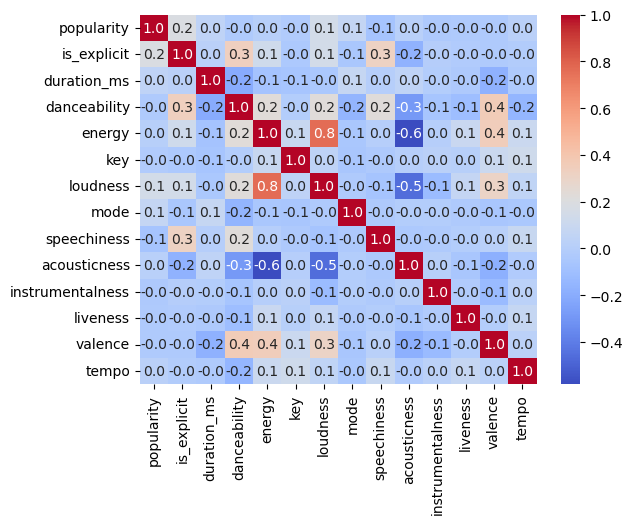

In [35]:
from numpy.ma.core import size
# heat map to check correlation of different musical aspects amoung themselves
sns.heatmap(df_a.corr(),annot=True, cmap='coolwarm', fmt=".1f")

**Conclusion:**

The provided correlation matrix describes the relationships between various attributes of the dataset, with a focus on how they correlate with one another. Each cell in the matrix represents the correlation coefficient between two attributes. Here's an interpretation of the correlations:

1. **Popularity**:
   - It has a weak positive correlation with `is_explicit` (0.186), indicating that more popular songs are slightly more likely to be explicit.
   - There is a very weak positive correlation with `loudness` (0.146), suggesting that more popular songs tend to be slightly louder.
   - Popularity has very weak correlations with other attributes.

2. **Is_Explicit**:
   - It has a moderate positive correlation with attributes like `danceability` (0.335), `energy` (0.129), and `speechiness` (0.316), suggesting that explicit songs may be more energetic and have more speech content.
   - It has a moderate negative correlation with `acousticness` (-0.170), indicating that explicit songs tend to have lower acoustic characteristics.

3. **Duration_ms**:
   - It has a weak negative correlation with attributes like `danceability` (-0.209) and `acousticness` (-0.288), suggesting that shorter songs may be less danceable and have lower acoustic characteristics.
   - It has a weak positive correlation with `tempo` (0.048), implying that shorter songs may have a slightly faster tempo.

4. **Danceability**:
   - It has a moderate positive correlation with `is_explicit` (0.335) and `energy` (0.231), indicating that more danceable songs may also be more explicit and energetic.
   - It has a moderate negative correlation with `acousticness` (-0.289), suggesting that less danceable songs tend to have higher acoustic characteristics.

5. **Energy**:
   - It has a strong positive correlation with `loudness` (0.761), indicating that songs with higher energy are typically louder.
   - It has a strong negative correlation with `acousticness` (-0.581), implying that more energetic songs are less acoustic.

6. **Key**, **Loudness**, **Mode**, **Speechiness**, **Acousticness**, **Instrumentalness**, **Liveness**, **Valence**, **Tempo**:
   - These attributes show various weak correlations with each other and with the other attributes. The relationships are not as strong as those mentioned above.

The correlation matrix helps us understand how different attributes relate to each other and can guide feature selection for further analysis or modeling. For example, if you want to predict the popularity of songs, you might consider attributes like `danceability`, `energy`, and `loudness` due to their correlations with popularity.

# Visualizations

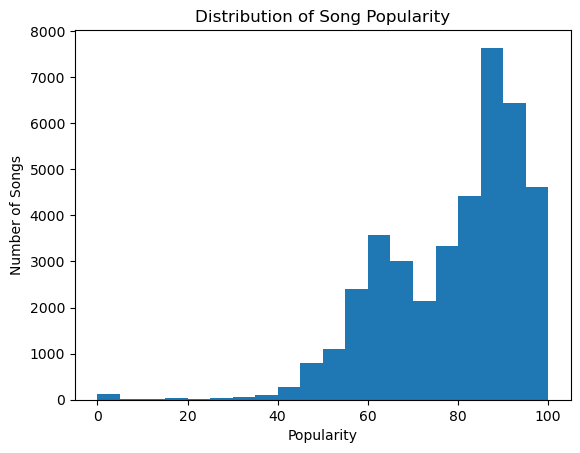

In [37]:
plt.hist(df['popularity'], bins=20)
plt.xlabel('Popularity')
plt.ylabel('Number of Songs')
plt.title('Distribution of Song Popularity')
plt.show()


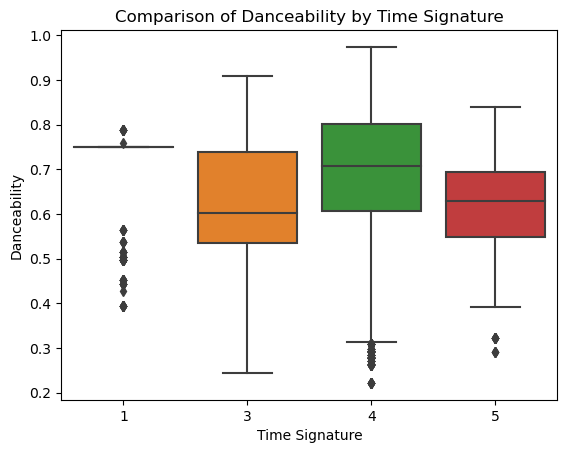

In [38]:
import seaborn as sns

sns.boxplot(x='time_signature', y='danceability', data=df)
plt.xlabel('Time Signature')
plt.ylabel('Danceability')
plt.title('Comparison of Danceability by Time Signature')
plt.show()


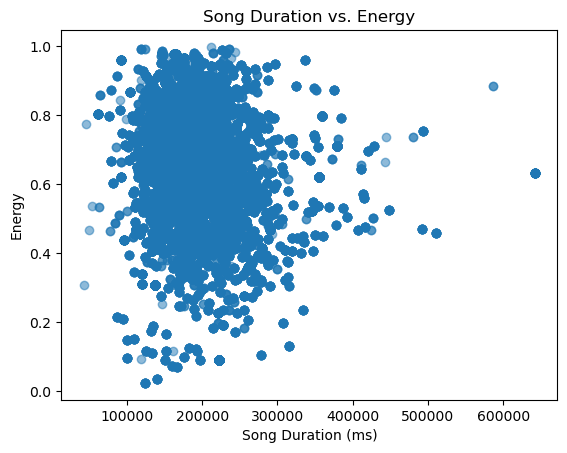

In [40]:
plt.scatter(df['duration_ms'], df['energy'], alpha=0.5)
plt.xlabel('Song Duration (ms)')
plt.ylabel('Energy')
plt.title('Song Duration vs. Energy')
plt.show()


# Data Insights

### Q1. Does the album release date affect the popularity of songs?

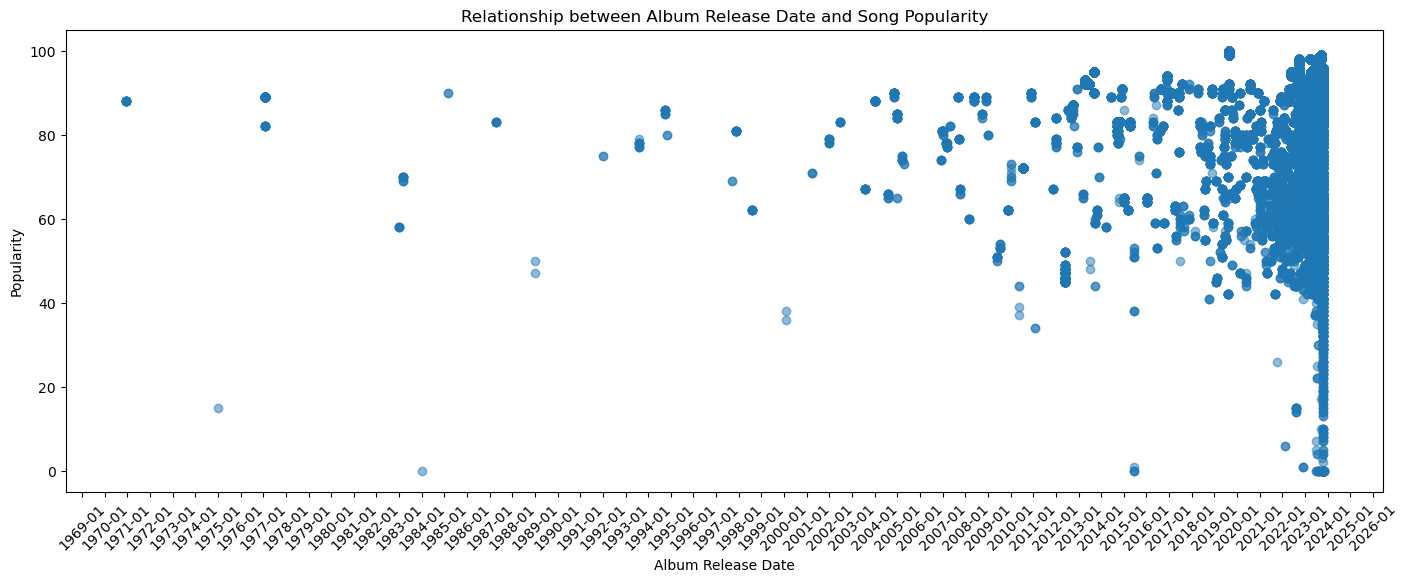

In [43]:
import matplotlib.dates as mdates

plt.figure(figsize=(17, 6))
df['album_release_date'] = pd.to_datetime(df['album_release_date'])
plt.scatter(df['album_release_date'], df['popularity'], alpha=0.5)
plt.xlabel('Album Release Date')
plt.ylabel('Popularity')
plt.title('Relationship between Album Release Date and Song Popularity')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.show()

### Q2. Which artists have the most songs in the dataset, and how does their popularity compare?

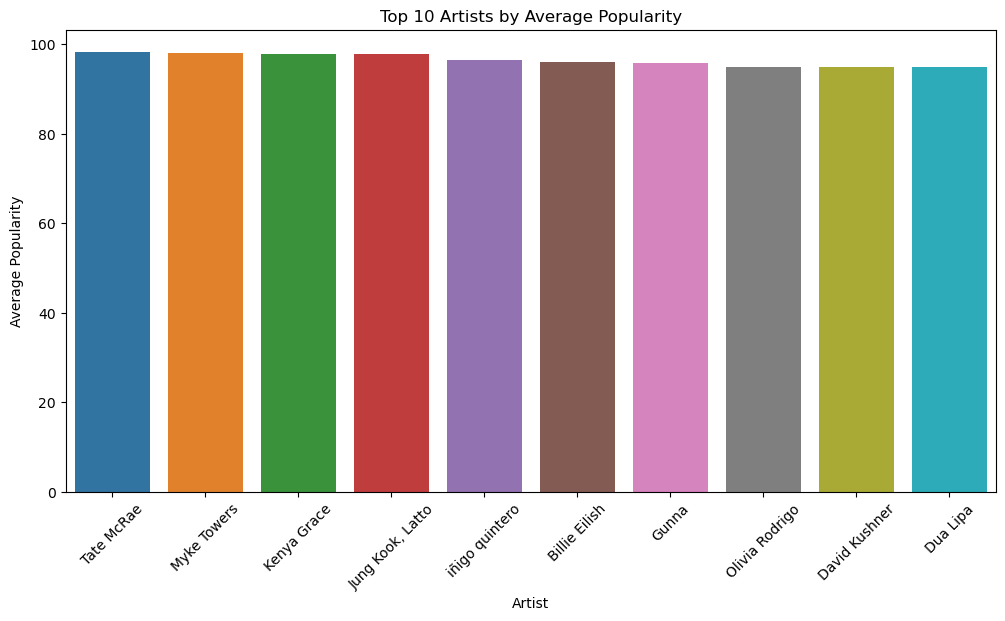

In [44]:
# Group by artists and calculate the average popularity for each artist
artist_popularity = df.groupby('artists')['popularity'].mean().reset_index()

# Sort by popularity to find the top artists
top_artists = artist_popularity.nlargest(10, 'popularity')

plt.figure(figsize=(12, 6))
sns.barplot(x='artists', y='popularity', data=top_artists)
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.title('Top 10 Artists by Average Popularity')
plt.xticks(rotation=45)
plt.show()

### Q3. Does the explicit content of songs affect their popularity?

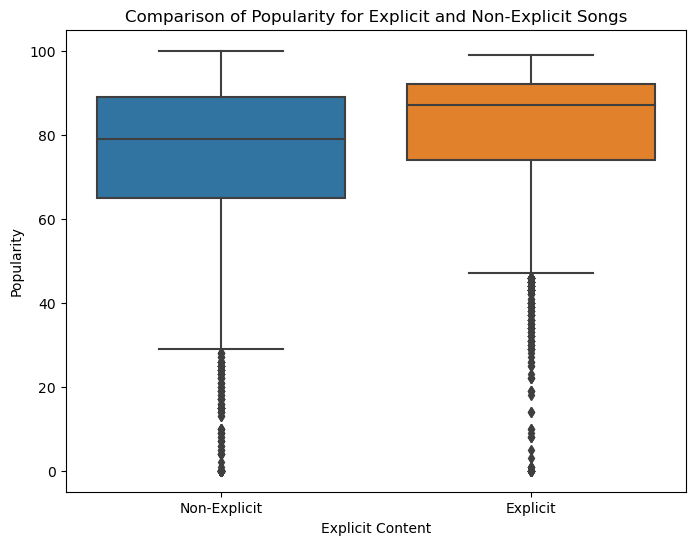

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_explicit', y='popularity', data=df)
plt.xlabel('Explicit Content')
plt.ylabel('Popularity')
plt.title('Comparison of Popularity for Explicit and Non-Explicit Songs')
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'])
plt.show()

### Q4. What are the top 10 countries by average popularity 

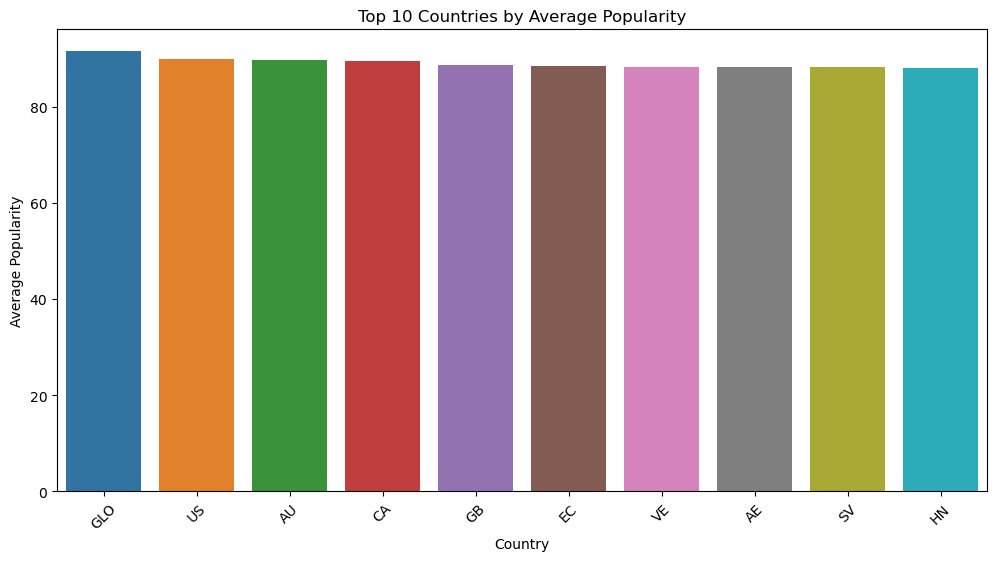

In [46]:
# Group by artists and calculate the average popularity for each artist
artist_popularity = df.groupby('country')['popularity'].mean().reset_index()

# Sort by popularity to find the top artists
top_artists = artist_popularity.nlargest(10, 'popularity')

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='popularity', data=top_artists)
plt.xlabel('Country')
plt.ylabel('Average Popularity')
plt.title('Top 10 Countries by Average Popularity')
plt.xticks(rotation=45)
plt.show()